<a href="https://colab.research.google.com/github/FrankPerera04/UoW_Data_Engineering_CW_2/blob/main/DSPL_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Scalling

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
# Scaling gets the values into one range which improves the performance of the models
# Here Min Max scaling gets it into between 1 and 0.

df = pd.read_csv("/content/drive/MyDrive/Colab Data Files/Data Science Project Lifecycle/Project/processed_traincsv.csv")

from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler()

# Select the columns to scale
columns_to_scale = ['luxury_sales', 'fresh_sales', 'dry_sales']

# Apply Min-Max Scaling
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the scaled DataFrame
df.head()

#Save The Dataset to drive
df.to_csv("/content/drive/MyDrive/Colab Data Files/Data Science Project Lifecycle/Project/processed_traincsv.csv", index=False)


# Model 01

## Gradient Boosting

Gradient Boosting is highly effective for customer segmentation in KJ Marketing’s project as it captures complex, non-linear relationships in purchasing behavior across luxury, fresh, and dry sales. It handles categorical and numerical data well, making it ideal for classifying customers based on historical sales. The model’s feature importance analysis helps identify key purchasing drivers, aiding in personalized marketing strategies. Additionally, its robustness to outliers and high predictive accuracy ensure reliable segmentation, ultimately enhancing targeted promotions and customer engagement.

In [4]:
# loading the dataset
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Data Files/Data Science Project Lifecycle/Project/processed_traincsv.csv")

In [5]:
# Importing essential models from sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [6]:
# Define X and Y variables
x = df[['luxury_sales','fresh_sales','dry_sales','outlet_city']]
y = df['cluster_catgeory']

In [7]:
#  splits the dataset (x, y) into training and testing sets, allocating 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
# initializing the Gradient boosting classifier
gbc_model = GradientBoostingClassifier(n_estimators=25, learning_rate=0.1, random_state=42)

In [9]:
# Train the gradient boosting classifier using the train data
gbc_model.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=25, random_state=42)

In [10]:
# predict using the model
y_pred = gbc_model.predict(x_test)

In [11]:
# Evaluate the model
MSE = mean_squared_error(y_test, y_pred)
r2_= r2_score(y_test, y_pred)
Acs = accuracy_score(y_test, y_pred)

print(f"MSE:{MSE}")
print(f"R2:{r2_}")
print(f"Accuracy:{Acs}")

MSE:0.13509463212970738
R2:0.9612942580637611
Accuracy:0.977146179187391


In [12]:
# Generate and print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.99      0.99     37911
           2       0.99      1.00      0.99     30903
           3       0.87      0.85      0.86      9791
           4       0.99      0.99      0.99     34409
           5       0.82      0.84      0.83      7924
           6       1.00      0.99      0.99     33872

    accuracy                           0.98    154810
   macro avg       0.94      0.94      0.94    154810
weighted avg       0.98      0.98      0.98    154810



## useful visualizations for Gradient Boosting Model

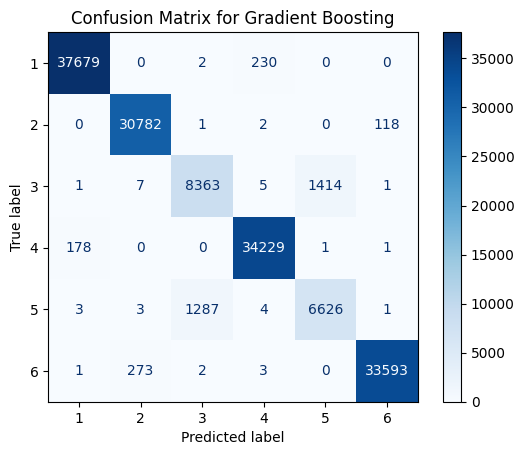

In [13]:
## confusion matrix
## To evaluate Model performance
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gbc_model, x_test, y_test, cmap="Blues")
plt.title("Confusion Matrix for Gradient Boosting")
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix

# Predict values using the trained Gradient Boosting model
y_pred = gbc_model.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[37679     0     2   230     0     0]
 [    0 30782     1     2     0   118]
 [    1     7  8363     5  1414     1]
 [  178     0     0 34229     1     1]
 [    3     3  1287     4  6626     1]
 [    1   273     2     3     0 33593]]


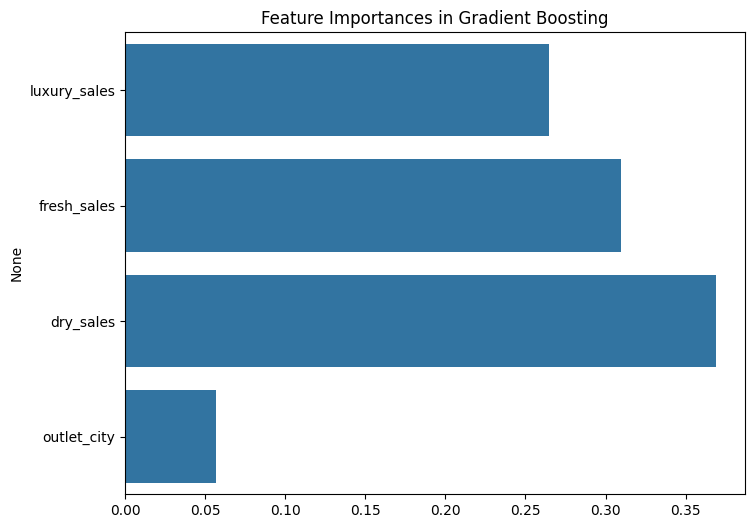

In [15]:
##importance plot
## shows which features contribute most to predictions
import seaborn as sns
importances = gbc_model.feature_importances_
features = x.columns
plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances in Gradient Boosting")
plt.show()

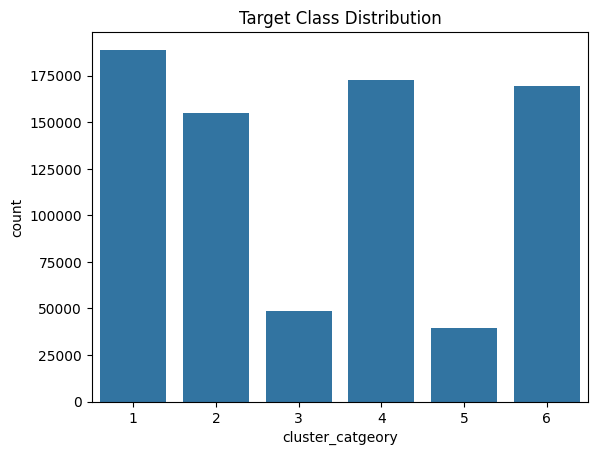

In [16]:
## visualizing class distribution
## checking how target variable is distributed
sns.countplot(x=y)
plt.title("Target Class Distribution")
plt.show()

sample

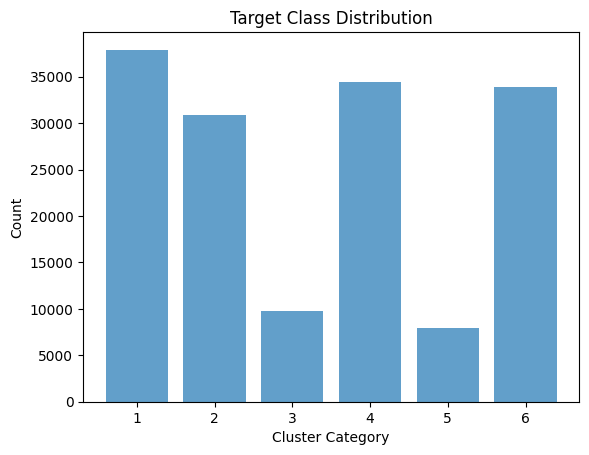

In [17]:
import matplotlib.pyplot as plt

# Actual class distribution
plt.bar(y_test.value_counts().index, y_test.value_counts().values, alpha=0.7)
plt.xlabel("Cluster Category")
plt.ylabel("Count")
plt.title("Target Class Distribution")
plt.show()

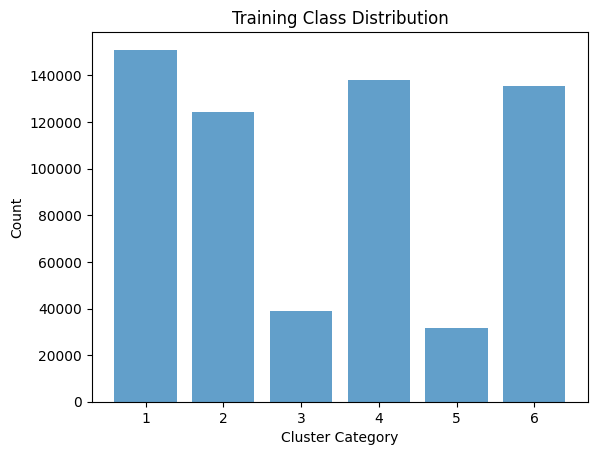

In [18]:
import matplotlib.pyplot as plt

# Training class distribution
plt.bar(y_train.value_counts().index, y_train.value_counts().values, alpha=0.7)
plt.xlabel("Cluster Category")
plt.ylabel("Count")
plt.title("Training Class Distribution")
plt.show()

In [19]:
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,outlet_city_original,total_sales,luxury_sales_pct
0,10493832.0,11,0.172099,0.053467,0.354981,4,Kelaniya,7257.60,16.666667
1,10178643.0,13,0.226508,0.075203,0.407956,1,Moratuwa,8657.32,18.367347
2,10513916.0,19,0.326422,0.105293,0.641183,4,Wattala,12925.44,17.708333
3,10334589.0,19,0.324429,0.123779,0.637052,4,Wattala,13114.36,17.346939
4,10458365.0,11,0.334516,0.147360,0.647737,4,Kelaniya,13659.03,17.171717


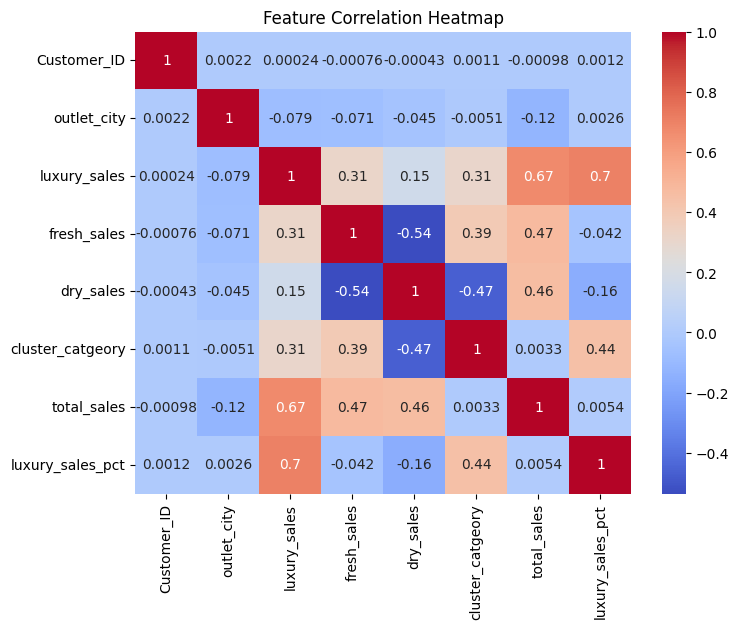

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Feature correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


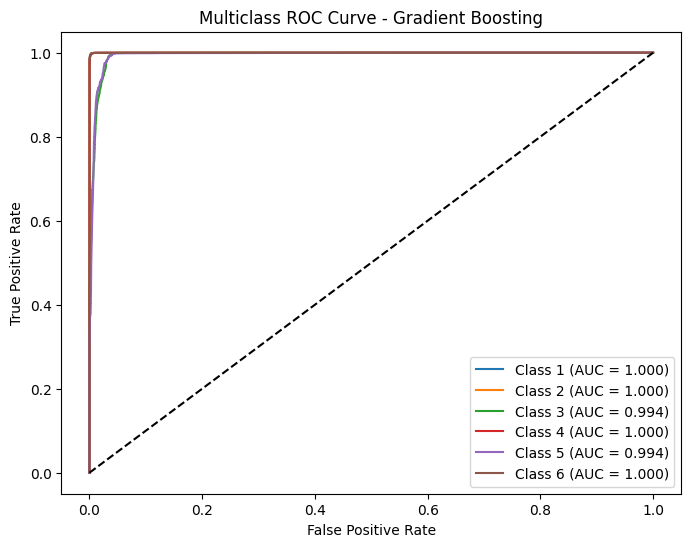

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Convert y_test to a binarized format (One-vs-Rest)
y_test_binarized = label_binarize(y_test, classes=gbc_model.classes_)

# Get probability scores for all classes
y_probs = gbc_model.predict_proba(x_test)

# Plot ROC Curve for each class
plt.figure(figsize=(8,6))

for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    auc_score = roc_auc_score(y_test_binarized[:, i], y_probs[:, i])
    plt.plot(fpr, tpr, label=f'Class {gbc_model.classes_[i]} (AUC = {auc_score:.3f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve - Gradient Boosting')
plt.legend()
plt.show()

## Evaluation

In [22]:
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix

# Predict on training and testing sets
y_train_pred = gbc_model.predict(x_train)
y_test_pred = gbc_model.predict(x_test)

# Calculate accuracy and MSE for training and testing sets
train_accuracy = float(f"{accuracy_score(y_train, y_train_pred):.3g}")
test_accuracy = float(f"{accuracy_score(y_test, y_test_pred):.3g}")


train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Classification Report for training and testing
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix for training and testing
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Print the results
print(f"Training Accuracy: {train_accuracy:.4f}, Testing Accuracy: {test_accuracy:.4f}")
print(f"Training MSE: {train_mse:.4f}, Testing MSE: {test_mse:.4f}")

# Determine if the model is overfitting or underfitting
if train_accuracy > test_accuracy:
    print("The model is overfitting.")
elif train_accuracy < test_accuracy:
    print("The model is underfitting.")
else:
    print("The model is well-fitted.")


Training Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.99      0.99    151050
           2       0.99      1.00      0.99    124137
           3       0.86      0.86      0.86     39099
           4       0.99      0.99      0.99    138018
           5       0.83      0.83      0.83     31601
           6       1.00      0.99      0.99    135334

    accuracy                           0.98    619239
   macro avg       0.94      0.94      0.94    619239
weighted avg       0.98      0.98      0.98    619239

Testing Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.99      0.99     37911
           2       0.99      1.00      0.99     30903
           3       0.87      0.85      0.86      9791
           4       0.99      0.99      0.99     34409
           5       0.82      0.84      0.83      7924
           6       1.00      0.99      0.99     33872

    accuracy  

# Model 02

## KNN Model

KNN classifies customers based on similar purchasing behaviors, making it simple, interpretable, and effective for small datasets. It adapts to new data dynamically, helping in personalized marketing by grouping similar buyers.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [ ]:
# loading the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Data Files/Data Science Project Lifecycle/Project/processed_traincsv.csv")

In [ ]:
# Define X (features) and Y (target)
x = df[['luxury_sales', 'fresh_sales', 'dry_sales', 'outlet_city']]
y = df['cluster_catgeory']

In [ ]:
# Encode categorical variables (if 'outlet_city' is categorical)
if df['outlet_city'].dtype == 'object':
    encoder = LabelEncoder()
    x['outlet_city'] = encoder.fit_transform(x['outlet_city'])

In [ ]:
# Standardize features (KNN performs better with scaled data)
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train KNN model with optimal K value
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune 'n_neighbors'
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions
y_pred = knn_model.predict(x_test)

In [ ]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     37911
           2       1.00      1.00      1.00     30903
           3       1.00      1.00      1.00      9791
           4       1.00      1.00      1.00     34409
           5       1.00      1.00      1.00      7924
           6       1.00      1.00      1.00     33872

    accuracy                           1.00    154810
   macro avg       1.00      1.00      1.00    154810
weighted avg       1.00      1.00      1.00    154810



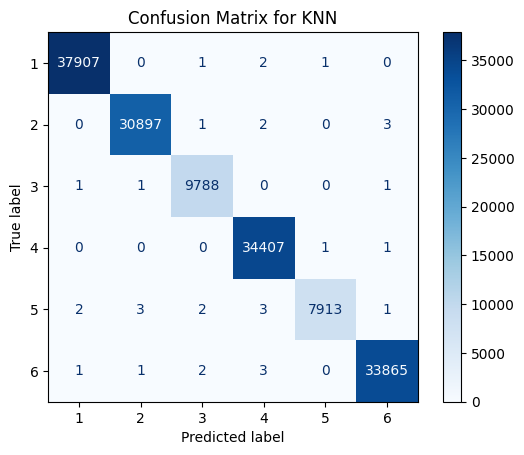

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn_model, x_test, y_test, cmap="Blues")
plt.title("Confusion Matrix for KNN")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict values using the trained KNN model
y_pred = knn_model.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[37907     0     1     2     1     0]
 [    0 30897     1     2     0     3]
 [    1     1  9788     0     0     1]
 [    0     0     0 34407     1     1]
 [    2     3     2     3  7913     1]
 [    1     1     2     3     0 33865]]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the model
MSE = mean_squared_error(y_test, y_pred)
r2_= r2_score(y_test, y_pred)
Acs = accuracy_score(y_test, y_pred)

print(f"MSE:{MSE}")
print(f"R2:{r2_}")
print(f"Accuracy:{Acs}")

MSE:0.0016536399457399392
R2:0.9995262183257303
Accuracy:0.9997868354757444


## Useful visualizations for KNN Model

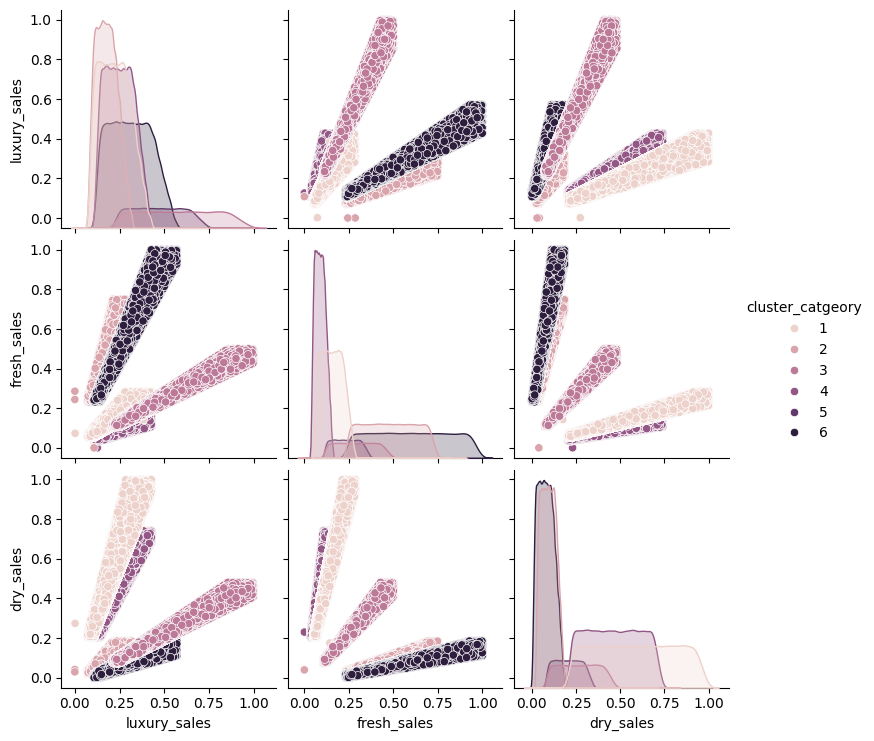

In [ ]:
## visualizing feature distributions
##Visualizing feature distribution helps understand how different sales categories vary across customer segments
sns.pairplot(df[['luxury_sales', 'fresh_sales', 'dry_sales', 'cluster_catgeory']], hue='cluster_catgeory')
plt.show()

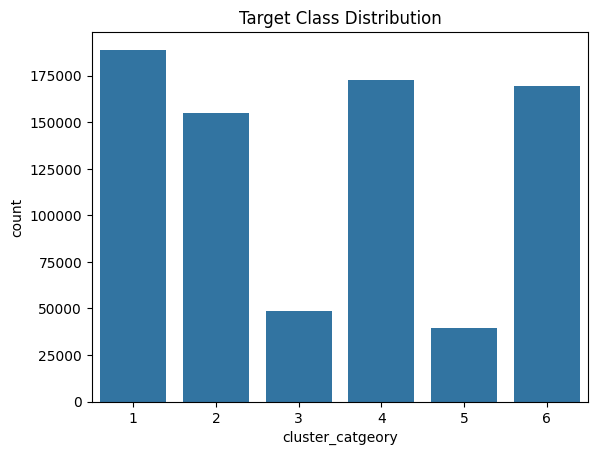

In [ ]:
## customer cluster distribution
##  ensures balanced segmentation and identifies any class imbalances in the target variable.
import seaborn as sns
import pandas as pd
y = df['cluster_catgeory']
sns.countplot(x=y)
plt.title("Target Class Distribution")
plt.show()

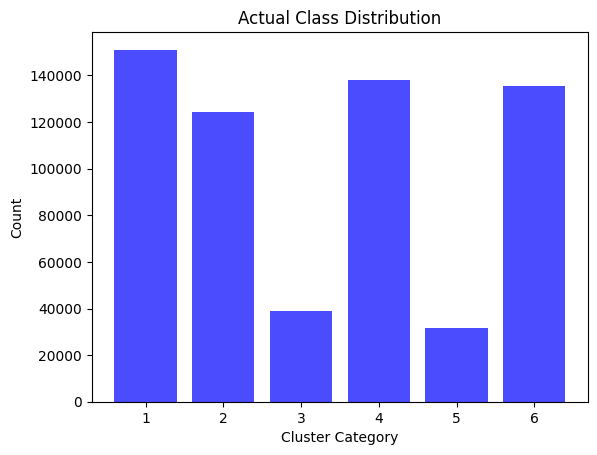

In [ ]:
# Actual class distribution
plt.bar(y_train.value_counts().index, y_train.value_counts().values, color='blue', alpha=0.7)
plt.xlabel("Cluster Category")
plt.ylabel("Count")
plt.title("Actual Class Distribution")
plt.show()

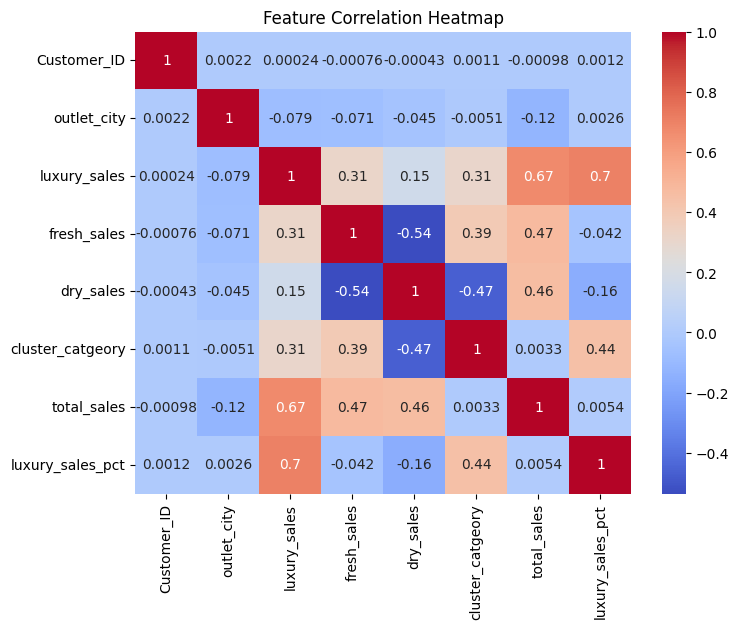

In [ ]:
## checking feature correlations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

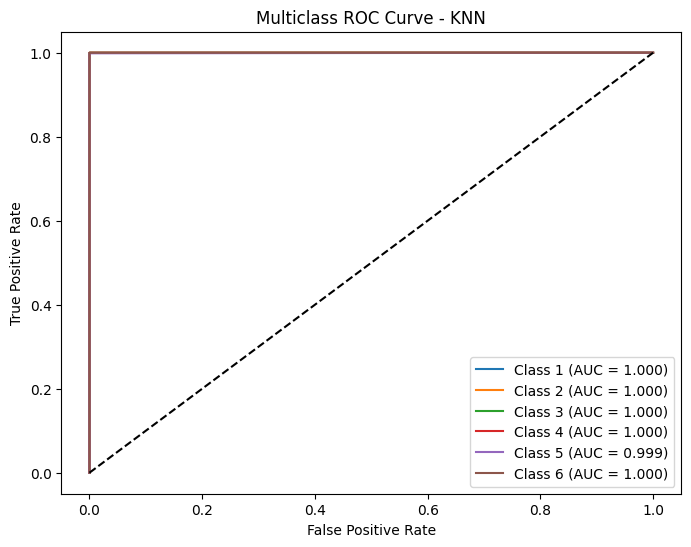

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Convert y_test to a binarized format (One-vs-Rest)
y_test_binarized = label_binarize(y_test, classes=knn_model.classes_)

# Get probability scores for all classes using predict_proba
y_probs = knn_model.predict_proba(x_test)

# Plot ROC Curve for each class
plt.figure(figsize=(8,6))

for i in range(y_test_binarized.shape[1]):  # Loop through each class
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    auc_score = roc_auc_score(y_test_binarized[:, i], y_probs[:, i])
    plt.plot(fpr, tpr, label=f'Class {knn_model.classes_[i]} (AUC = {auc_score:.3f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve - KNN')
plt.legend()
plt.show()

## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix

# Predict on training and testing sets
y_train_pred = knn_model.predict(x_train)
y_test_pred = knn_model.predict(x_test)

# Calculate accuracy and MSE for training and testing sets
train_accuracy = float(f"{accuracy_score(y_train, y_train_pred):.3g}")
test_accuracy = float(f"{accuracy_score(y_test, y_test_pred):.3g}")


train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Classification Report for training and testing
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix for training and testing
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Print the results
print(f"Training Accuracy: {train_accuracy:.4f}, Testing Accuracy: {test_accuracy:.4f}")
print(f"Training MSE: {train_mse:.4f}, Testing MSE: {test_mse:.4f}")

# Determine if the model is overfitting or underfitting
if train_accuracy > test_accuracy:
    print("The model is overfitting.")
elif train_accuracy < test_accuracy:
    print("The model is underfitting.")
else:
    print("The model is well-fitted.")


Training Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00    151050
           2       1.00      1.00      1.00    124137
           3       1.00      1.00      1.00     39099
           4       1.00      1.00      1.00    138018
           5       1.00      1.00      1.00     31601
           6       1.00      1.00      1.00    135334

    accuracy                           1.00    619239
   macro avg       1.00      1.00      1.00    619239
weighted avg       1.00      1.00      1.00    619239

Testing Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37911
           2       1.00      1.00      1.00     30903
           3       1.00      1.00      1.00      9791
           4       1.00      1.00      1.00     34409
           5       1.00      1.00      1.00      7924
           6       1.00      1.00      1.00     33872

    accuracy  

# Model 03

## Logistic regression Model

Logistic regression is ideal for KJ Marketing’s customer segmentation due to its interpretability, efficiency, and ability to provide probability-based insights for personalized marketing. It handles both binary and multiclass classification while minimizing overfitting, making it a reliable and practical choice

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Data Files/Data Science Project Lifecycle/Project/processed_traincsv.csv")

In [ ]:
# Define X (features) and Y (target)
x = df[['luxury_sales', 'fresh_sales', 'dry_sales', 'outlet_city']]
y = df['cluster_catgeory']

In [ ]:
# Encode categorical variables (if 'outlet_city' is categorical)
if df['outlet_city'].dtype == 'object':
    encoder = LabelEncoder()
    x['outlet_city'] = encoder.fit_transform(x['outlet_city'])

In [ ]:
# Standardize features (Logistic Regression performs better with scaled data)
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train Logistic Regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
# Make predictions
y_pred = log_reg.predict(x_test)

In [ ]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     37911
           2       1.00      1.00      1.00     30903
           3       0.73      0.75      0.74      9791
           4       1.00      1.00      1.00     34409
           5       0.68      0.65      0.67      7924
           6       1.00      1.00      1.00     33872

    accuracy                           0.96    154810
   macro avg       0.90      0.90      0.90    154810
weighted avg       0.96      0.96      0.96    154810



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the model
MSE = mean_squared_error(y_test, y_pred)
r2_= r2_score(y_test, y_pred)
Acs = accuracy_score(y_test, y_pred)

print(f"MSE:{MSE}")
print(f"R2:{r2_}")
print(f"Accuracy:{Acs}")

MSE:0.17314126994380208
R2:0.9503935781362272
Accuracy:0.963290485110781


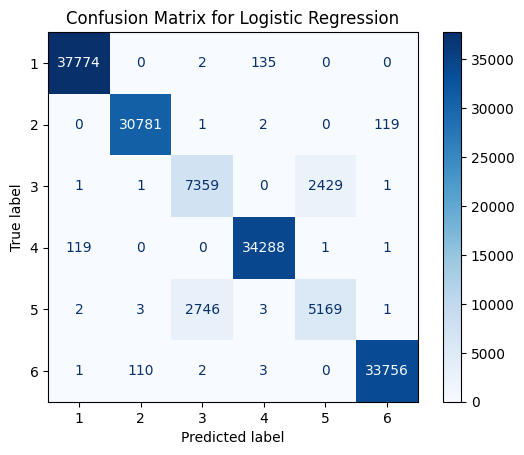

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(log_reg, x_test, y_test, cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict values using the trained Logistic Regression model
y_pred = log_reg.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[37774     0     2   135     0     0]
 [    0 30781     1     2     0   119]
 [    1     1  7359     0  2429     1]
 [  119     0     0 34288     1     1]
 [    2     3  2746     3  5169     1]
 [    1   110     2     3     0 33756]]


## Useful visualizations for regression Model

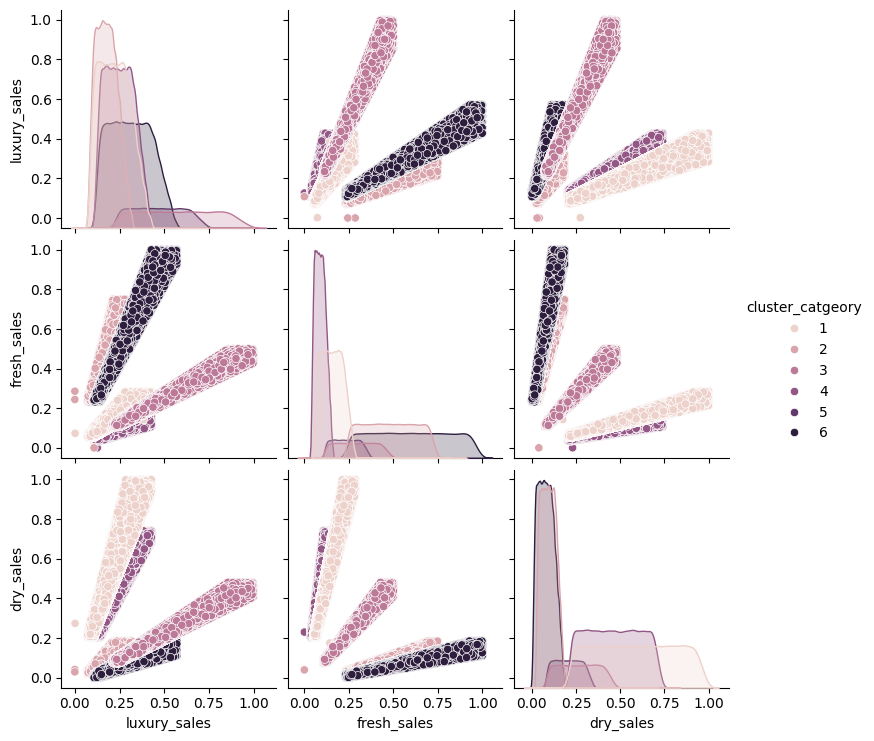

In [ ]:
## visualizing feature distributions
sns.pairplot(df[['luxury_sales', 'fresh_sales', 'dry_sales', 'cluster_catgeory']], hue='cluster_catgeory')
plt.show()

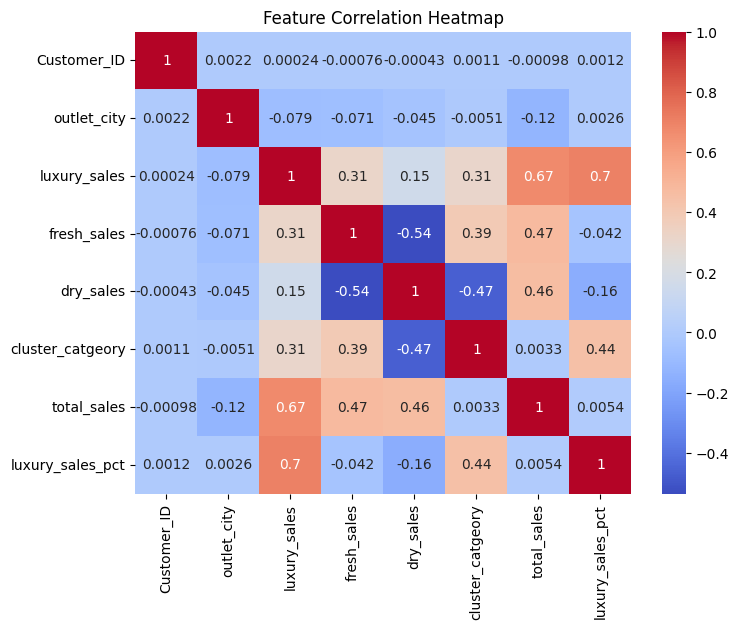

In [ ]:
## checking feature correlations
plt.figure(figsize=(8,6))
# Calculate correlation only for numeric features
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

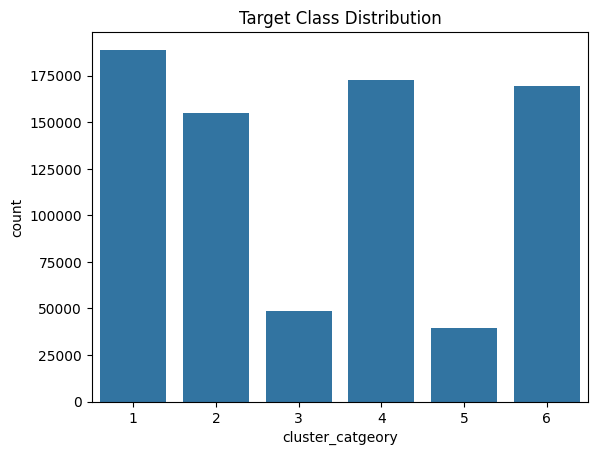

In [ ]:
## customer cluster distribution
sns.countplot(x=y)
plt.title("Target Class Distribution")
plt.show()

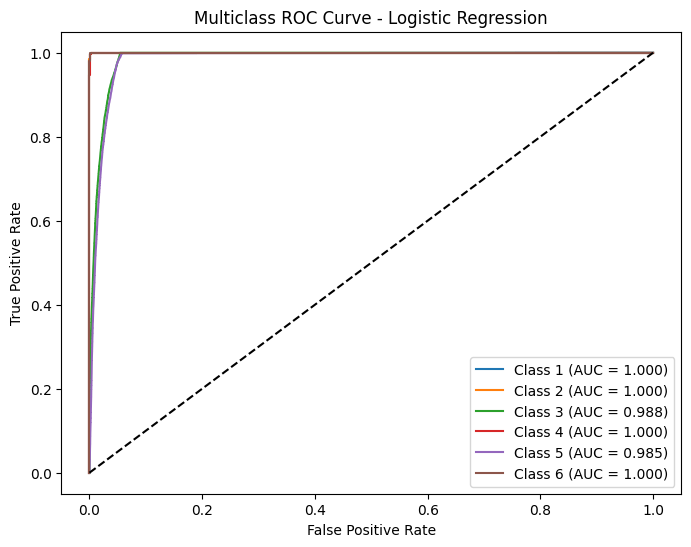

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Convert y_test to a binarized format (One-vs-Rest)
y_test_binarized = label_binarize(y_test, classes=log_reg.classes_)

# Get probability scores for all classes
y_probs = log_reg.predict_proba(x_test)

# Plot ROC Curve for each class
plt.figure(figsize=(8,6))

for i in range(y_test_binarized.shape[1]):  # Loop through each class
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    auc_score = roc_auc_score(y_test_binarized[:, i], y_probs[:, i])
    plt.plot(fpr, tpr, label=f'Class {log_reg.classes_[i]} (AUC = {auc_score:.3f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve - Logistic Regression')
plt.legend()
plt.show()

## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix

# Predict on training and testing sets
y_train_pred = log_reg.predict(x_train)
y_test_pred = log_reg.predict(x_test)

# Calculate accuracy and MSE for training and testing sets
train_accuracy = float(f"{accuracy_score(y_train, y_train_pred):.3g}")
test_accuracy = float(f"{accuracy_score(y_test, y_test_pred):.3g}")

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Classification Report for training and testing
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix for training and testing
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Print the results
print(f"Training Accuracy: {train_accuracy:.4f}, Testing Accuracy: {test_accuracy:.4f}")
print(f"Training MSE: {train_mse:.4f}, Testing MSE: {test_mse:.4f}")

# Determine if the model is overfitting or underfitting
if train_accuracy > test_accuracy:
    print("The model is overfitting.")
elif train_accuracy < test_accuracy:
    print("The model is underfitting.")
else:
    print("The model is well-fitted.")


Training Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00    151050
           2       1.00      1.00      1.00    124137
           3       0.73      0.75      0.74     39099
           4       1.00      1.00      1.00    138018
           5       0.68      0.65      0.67     31601
           6       1.00      1.00      1.00    135334

    accuracy                           0.96    619239
   macro avg       0.90      0.90      0.90    619239
weighted avg       0.96      0.96      0.96    619239

Testing Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37911
           2       1.00      1.00      1.00     30903
           3       0.73      0.75      0.74      9791
           4       1.00      1.00      1.00     34409
           5       0.68      0.65      0.67      7924
           6       1.00      1.00      1.00     33872

    accuracy  

# Model 05

## Random Forest Model

In [ ]:
import pandas as pd
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Data Files/Data Science Project Lifecycle/Project/processed_traincsv.csv")

In [ ]:
print(df.dtypes)
print(df.info())

Customer_ID             float64
outlet_city               int64
luxury_sales            float64
fresh_sales             float64
dry_sales               float64
cluster_catgeory          int64
outlet_city_original     object
total_sales             float64
luxury_sales_pct        float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774049 entries, 0 to 774048
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Customer_ID           774049 non-null  float64
 1   outlet_city           774049 non-null  int64  
 2   luxury_sales          774049 non-null  float64
 3   fresh_sales           774049 non-null  float64
 4   dry_sales             774049 non-null  float64
 5   cluster_catgeory      774049 non-null  int64  
 6   outlet_city_original  774049 non-null  object 
 7   total_sales           774049 non-null  float64
 8   luxury_sales_pct      774049 non-null  float64
dtypes: float64(

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define features and target
X = df[['luxury_sales','fresh_sales','dry_sales','outlet_city']]
y = df['cluster_catgeory']

# Split data into training and testing sets (80-20 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=25, random_state=42)
rf_model.fit(x_train, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


## Useful Visualisations for Random Forest Model

In [ ]:
# @title Evaluation of Random Forest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the testing set
y_pred = rf_model.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Classification Report (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 99.92%
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37792
           2       1.00      1.00      1.00     31008
           3       1.00      1.00      1.00      9778
           4       1.00      1.00      1.00     34486
           5       1.00      1.00      1.00      7905
           6       1.00      1.00      1.00     33841

    accuracy                           1.00    154810
   macro avg       1.00      1.00      1.00    154810
weighted avg       1.00      1.00      1.00    154810

Confusion Matrix:
[[37760     1     1    29     0     1]
 [    0 30988     1     1     0    18]
 [    1     0  9775     1     1     0]
 [   15     0     4 34466     1     0]
 [    1     0    16     1  7887     0]
 [    1    24     3     2     1 33810]]


In [ ]:
# Make predictions on the training set
y_train_pred = rf_model.predict(x_train)

# Accuracy on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Classification Report for training set
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

# Confusion Matrix for training set
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

Training Accuracy: 1.0000
Training Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00    151169
           2       1.00      1.00      1.00    124032
           3       1.00      1.00      1.00     39112
           4       1.00      1.00      1.00    137941
           5       1.00      1.00      1.00     31620
           6       1.00      1.00      1.00    135365

    accuracy                           1.00    619239
   macro avg       1.00      1.00      1.00    619239
weighted avg       1.00      1.00      1.00    619239

Training Confusion Matrix:
[[151167      0      0      0      0      2]
 [     0 124031      0      0      0      1]
 [     2      0  39110      0      0      0]
 [     0      0      0 137939      1      1]
 [     0      0      2      0  31615      3]
 [     0      0      0      0      1 135364]]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model using y_test instead of y_val
MSE = mean_squared_error(y_test, y_pred)
r2_ = r2_score(y_test, y_pred)
Acs = accuracy_score(y_test, y_pred)

print(f"MSE: {MSE}")
print(f"R2: {r2_}")
print(f"Accuracy: {Acs}")

MSE: 0.008132549576900718
R2: 0.9976669551562968
Accuracy: 0.9991990181512822


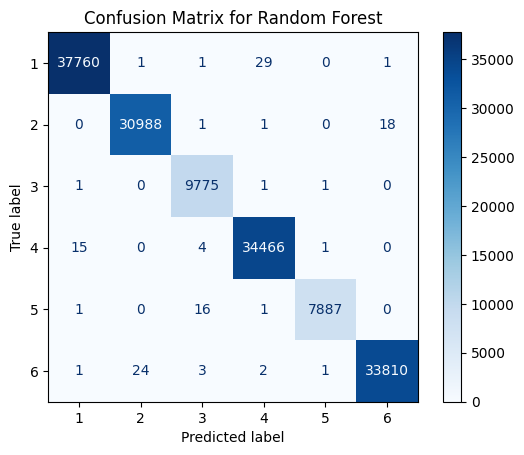

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use x_test and y_test instead of X_val and y_val
ConfusionMatrixDisplay.from_estimator(rf_model, x_test, y_test, cmap="Blues")
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict values using the trained model
y_pred = rf_model.predict(x_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:\n", cm)

# Extract and print TP, FP, FN, TN for each class
for i in range(len(cm)):
    tp = cm[i, i]
    fp = cm[:, i].sum() - tp
    fn = cm[i, :].sum() - tp
    tn = cm.sum() - (tp + fp + fn)
    print(f"Class {i}: TP={tp}, FP={fp}, FN={fn}, TN={tn}")

Confusion Matrix:
 [[37760     1     1    29     0     1]
 [    0 30988     1     1     0    18]
 [    1     0  9775     1     1     0]
 [   15     0     4 34466     1     0]
 [    1     0    16     1  7887     0]
 [    1    24     3     2     1 33810]]
Class 0: TP=37760, FP=18, FN=32, TN=117000
Class 1: TP=30988, FP=25, FN=20, TN=123777
Class 2: TP=9775, FP=25, FN=3, TN=145007
Class 3: TP=34466, FP=34, FN=20, TN=120290
Class 4: TP=7887, FP=3, FN=18, TN=146902
Class 5: TP=33810, FP=19, FN=31, TN=120950


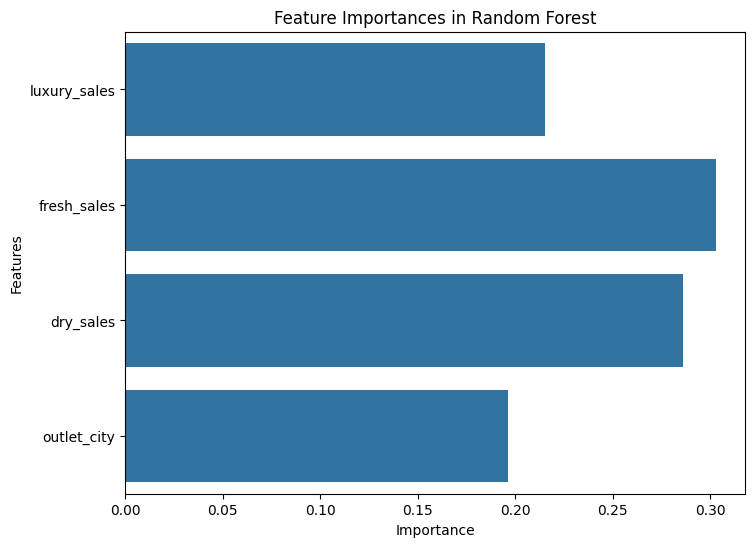

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from Random Forest model
importances = rf_model.feature_importances_
#features = x_test.columns  # Use x_test since it has the correct columns

# Get the original feature names from 'X' before scaling
features = X.columns

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

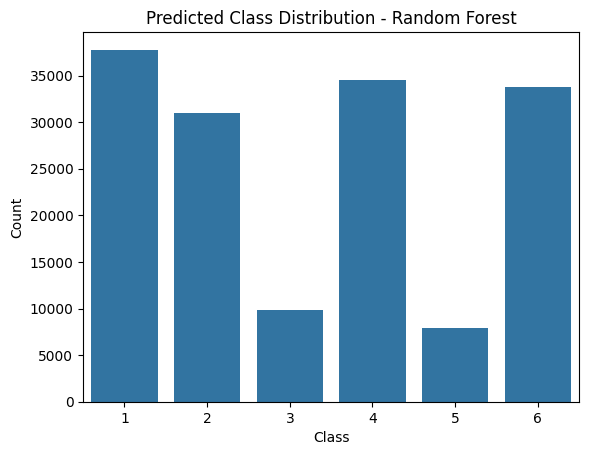

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_rf = rf_model.predict(x_test)

# Plot predicted class distribution
sns.countplot(x=y_pred_rf)
plt.title("Predicted Class Distribution - Random Forest")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [ ]:
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,outlet_city_original,total_sales,luxury_sales_pct
0,10493832.0,11,0.172099,0.053467,0.354981,4,Kelaniya,7257.60,16.666667
1,10178643.0,13,0.226508,0.075203,0.407956,1,Moratuwa,8657.32,18.367347
2,10513916.0,19,0.326422,0.105293,0.641183,4,Wattala,12925.44,17.708333
3,10334589.0,19,0.324429,0.123779,0.637052,4,Wattala,13114.36,17.346939
4,10458365.0,11,0.334516,0.147360,0.647737,4,Kelaniya,13659.03,17.171717


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


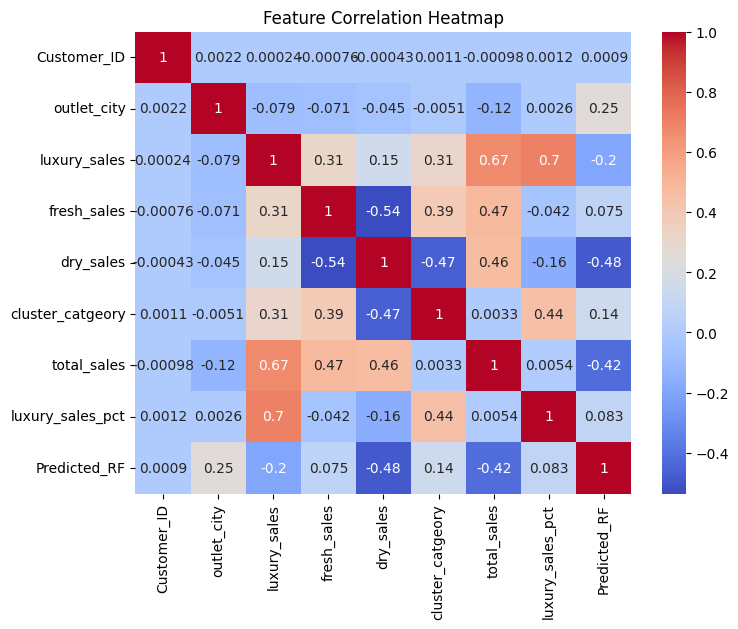

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define features for prediction (using the same features as training)
X = df[['luxury_sales','fresh_sales','dry_sales','outlet_city']] # Re-define X

# Predict using Random Forest with the defined features
df["Predicted_RF"] = rf_model.predict(X)

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

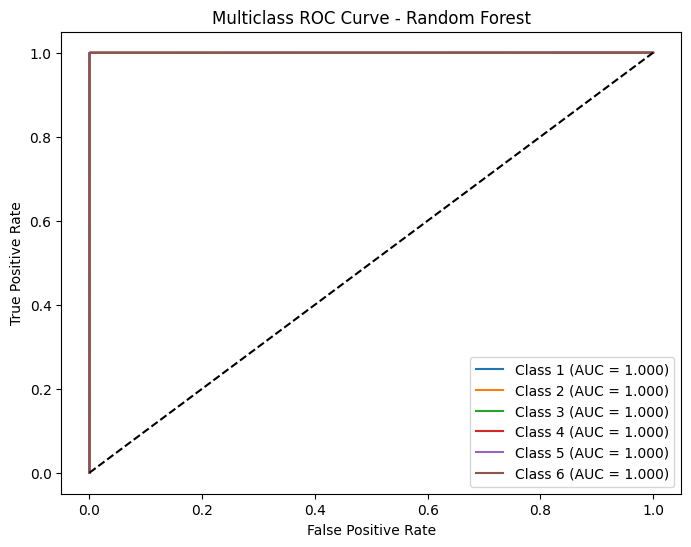

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Convert y_test to a binarized format (One-vs-Rest)
y_test_binarized = label_binarize(y_test, classes=rf_model.classes_)

# Get probability scores for all classes using x_test (your test data)
y_probs = rf_model.predict_proba(x_test)

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))

for i in range(y_test_binarized.shape[1]):  # Loop through each class
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    auc_score = roc_auc_score(y_test_binarized[:, i], y_probs[:, i])
    plt.plot(fpr, tpr, label=f'Class {rf_model.classes_[i]} (AUC = {auc_score:.3f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve - Random Forest')
plt.legend()
plt.show()


## **Evaluation**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Adjust hyperparameters
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix

# Predict on training and testing sets
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

# Calculate accuracy and MSE for training and testing sets
train_accuracy = float(f"{accuracy_score(y_train, y_train_pred):.3g}")
test_accuracy = float(f"{accuracy_score(y_test, y_test_pred):.3g}")

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Classification Report for training and testing
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix for training and testing
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Print the results
print(f"Training Accuracy: {train_accuracy:.4f}, Testing Accuracy: {test_accuracy:.4f}")
print(f"Training MSE: {train_mse:.4f}, Testing MSE: {test_mse:.4f}")

# Determine if the model is overfitting or underfitting
if train_accuracy > test_accuracy:
    print("The model is overfitting.")
elif train_accuracy < test_accuracy:
    print("The model is underfitting.")
else:
    print("The model is well-fitted.")

Training Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00    151169
           2       1.00      1.00      1.00    124032
           3       0.95      0.95      0.95     39112
           4       1.00      1.00      1.00    137941
           5       0.93      0.94      0.93     31620
           6       1.00      1.00      1.00    135365

    accuracy                           0.99    619239
   macro avg       0.98      0.98      0.98    619239
weighted avg       0.99      0.99      0.99    619239

Testing Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37792
           2       1.00      1.00      1.00     31008
           3       0.94      0.94      0.94      9778
           4       1.00      1.00      1.00     34486
           5       0.93      0.92      0.93      7905
           6       1.00      1.00      1.00     33841

    accuracy  